<a href="https://colab.research.google.com/github/jfhidalgow/Practice_EDA/blob/main/EDA_Ejercicio_2_exploracion_airbnb_barcelona_con_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA - Ejercicio 2: exploracion_airbnb_barcelona.ipynb

En este ejercicio trabajaremos con el dataset de alojamientos de Airbnb en Barcelona que proporciona Inside Airbnb. Aplicaremos técnicas de exploración de datos para entender su estructura, calidad y patrones.

### Objetivos
- Identificar tipos de variables y estructura básica del dataset.
- Detectar valores nulos, duplicados y outliers relevantes.
- Explorar relaciones y correlaciones entre variables numéricas y categóricas.
- Generar visualizaciones útiles para la toma de decisiones.

### Descripción del dataset
El dataset proviene de Inside Airbnb (Sección "Get the Data" para Barcelona). Incluye `listings.csv`, que contiene información de los alojamientos: precio, tipo de habitación, barrio/neighborhood, número de noches mínimas, latitud, longitud, disponibilidad, etc.

Fuente: [Inside Airbnb Barcelona](https://data.insideairbnb.com/spain/catalonia/barcelona/2025-06-12/visualisations/listings.csv)

Como Inside Airbnb cambia el enlace con cada nueva release, puede que sea necesario actualizarlo buscandolo en [Inside Airbnb](https://insideairbnb.com/get-the-data/)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
url = 'https://data.insideairbnb.com/spain/catalonia/barcelona/2025-06-12/visualisations/listings.csv'
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,232.0,1,48,2025-06-11,0.33,28,65,6,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,382.0,3,88,2025-05-31,0.51,1,174,10,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,186.0,1,147,2025-05-14,0.87,3,39,26,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,131.0,31,25,2024-11-05,0.14,3,333,9,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,449.0,5,267,2025-06-17,1.49,3,315,31,ESFCTU000008119000093652000000000000000HUTB-00...


### Tipos de variables y resumen estadístico

In [ ]:
df.dtypes.value_counts()

,count
int64,7
object,7
float64,4


In [ ]:
# TODO: mostrar resumen estadístico de variables categóricas con describe(include='object')
# Explica qué te llama la atención del resultado
df.describe(include='all')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.892700e+04,18927,1.892700e+04,18924,18927,18927,18927.000000,18927.000000,18927,14913.000000,18927.000000,18927.000000,13929,13929.000000,18927.000000,18927.000000,18927.000000,12598
unique,NaN,18165,NaN,3212,10,70,NaN,NaN,4,NaN,NaN,NaN,1828,NaN,NaN,NaN,NaN,6111
top,NaN,Double room with balcony,NaN,Ukio,Eixample,la Dreta de l'Eixample,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2025-06-08,NaN,NaN,NaN,NaN,Exempt
freq,NaN,12,NaN,522,6655,2308,NaN,NaN,11657,NaN,NaN,NaN,495,NaN,NaN,NaN,NaN,4741
mean,5.644774e+17,NaN,2.007217e+08,NaN,NaN,NaN,41.392254,2.166862,NaN,214.380071,16.428700,51.420880,NaN,1.454379,58.118402,189.396629,11.485497,NaN
std,5.586685e+17,NaN,2.027743e+08,NaN,NaN,NaN,0.014058,0.017843,NaN,385.402591,29.671949,105.225157,NaN,2.117481,118.410875,125.983317,22.548024,NaN
min,1.867400e+04,NaN,3.073000e+03,NaN,NaN,NaN,41.335310,2.085593,NaN,9.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.842925e+07,NaN,1.142567e+07,NaN,NaN,NaN,41.381170,2.156303,NaN,74.000000,1.000000,0.000000,NaN,0.190000,2.000000,75.000000,0.000000,NaN
50%,6.396171e+17,NaN,1.329791e+08,NaN,NaN,NaN,41.390120,2.167680,NaN,143.000000,3.000000,6.000000,NaN,0.750000,7.000000,204.000000,1.000000,NaN
75%,1.112177e+18,NaN,3.579465e+08,NaN,NaN,NaN,41.401610,2.177699,NaN,256.000000,31.000000,53.000000,NaN,2.180000,39.000000,305.000000,15.000000,NaN


### Valores nulos y duplicados

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
license,6329
reviews_per_month,4998
last_review,4998
price,4014
host_name,3
id,0
name,0
neighbourhood,0
neighbourhood_group,0
host_id,0


In [ ]:
# TODO: calcular porcentaje de nulos por columna, mostrar solo columnas con más del 10%
df.isnull().mean().sort_values(ascending=False)*100


,0
license,33.439002
reviews_per_month,26.406721
last_review,26.406721
price,21.207798
host_name,0.015850
id,0.000000
name,0.000000
neighbourhood,0.000000
neighbourhood_group,0.000000
host_id,0.000000


In [ ]:
a = df.isnull().mean().sort_values(ascending=False)*100
round(a[a > 10],2)

,0
license,33.44
reviews_per_month,26.41
last_review,26.41
price,21.21


In [ ]:
# TODO: calcular valor total de duplicados, devolver como int ( -> por ejemplo 10 valores duplicados)
print(f"{df.duplicated().sum()} valores duplicados")

0 valores duplicados


### Distribución de variables numéricas

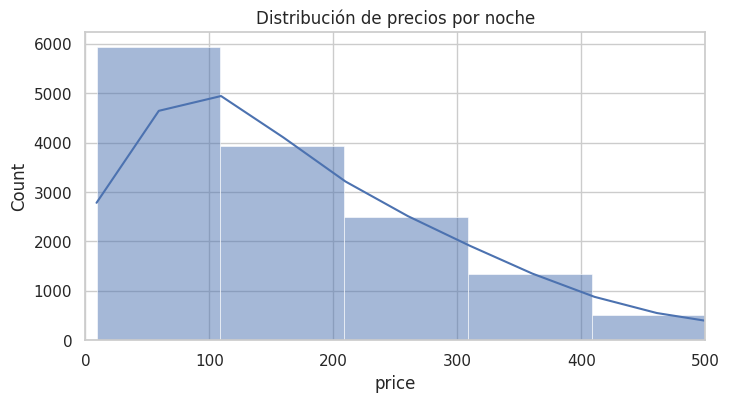

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribución de precios por noche')
plt.xlim(0, 500)
plt.show()

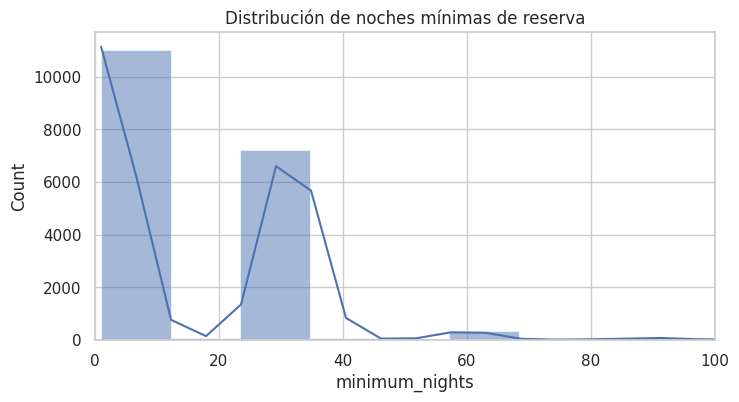

In [ ]:
# TODO: explorar distribución de minimum_nights, availability_365 u otra variable relevante
plt.figure(figsize=(8,4))
sns.histplot(df['minimum_nights'], bins=100, kde=True)
plt.title('Distribución de noches mínimas de reserva')
plt.xlim(0, 100)
plt.show()


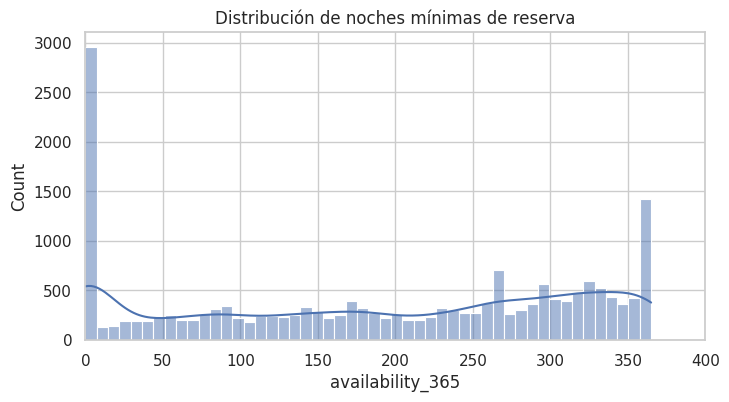

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['availability_365'], bins=50, kde=True)
plt.title('Distribución de noches mínimas de reserva')
plt.xlim(0, 400)
plt.show()

### Outliers

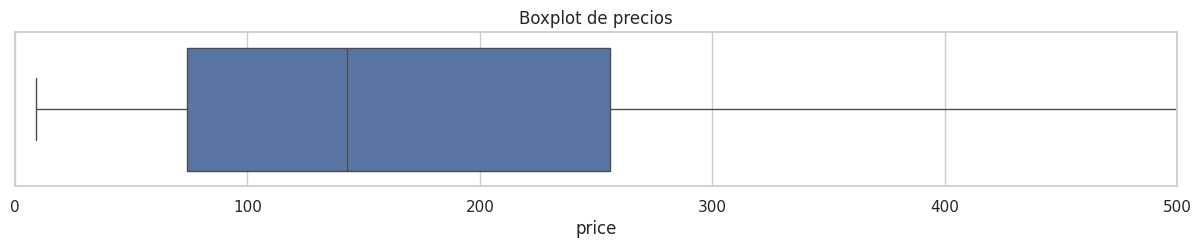

In [ ]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['price'])
plt.title('Boxplot de precios')
plt.xlim(0, 500)
plt.show()

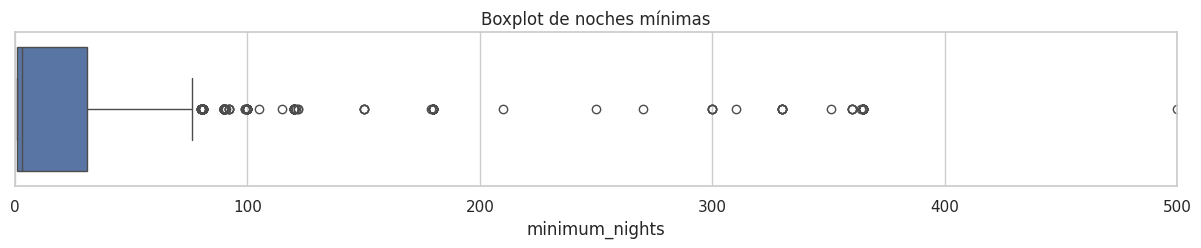

In [ ]:
# TODO: hacer boxplot de otra variable numérica como minimum_nights
plt.figure(figsize=(15,2))
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot de noches mínimas')
plt.xlim(0, 500)
plt.show()

### Distribución geográfica

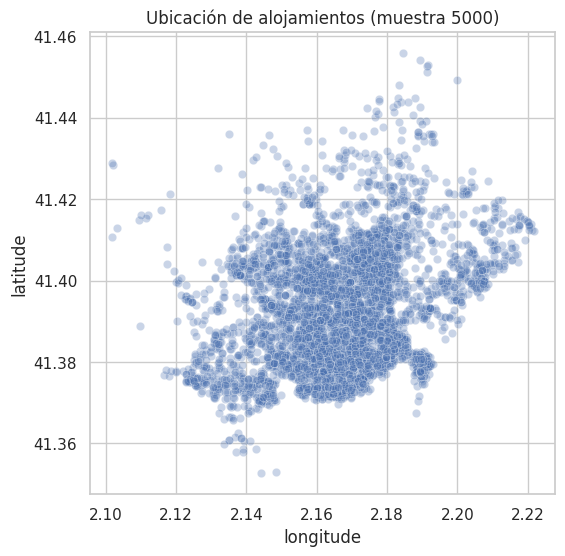

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df.sample(5000), x='longitude', y='latitude', alpha=0.3)
plt.title('Ubicación de alojamientos (muestra 5000)')
plt.show()

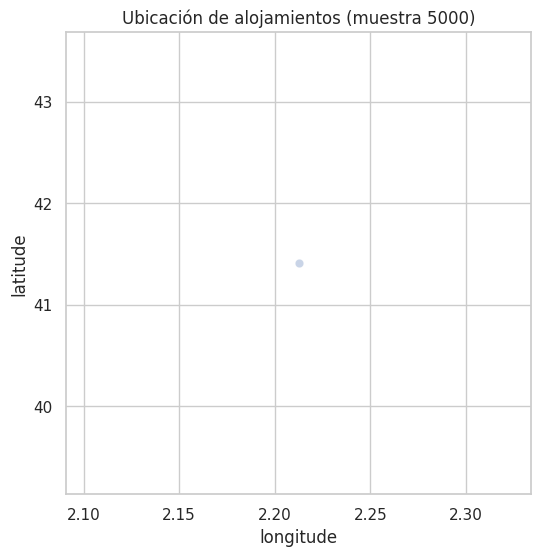

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df[df['price']<10], x='longitude', y='latitude', alpha=0.3)
plt.title('Ubicación de alojamientos (muestra 5000)')
plt.show()

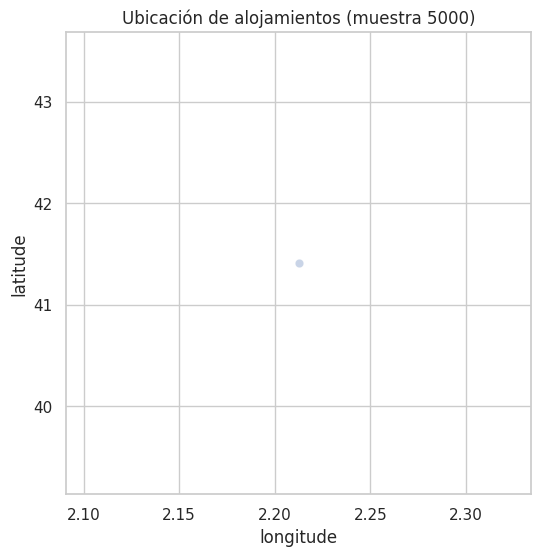

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df[(df['price']<10) & (df['availability_365']>10)] , x='longitude', y='latitude', alpha=0.3)
plt.title('Ubicación de alojamientos (muestra 5000)')
plt.show()

## P

In [ ]:
df[df['price']<10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15581,1199217245256170539,"Apartamento en la playa, con vistas al mar/pis...",33316741,Jorge,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408517,2.212484,Entire home/apt,9.0,31,0,NaN,NaN,1,124,0,NaN


### Correlaciones

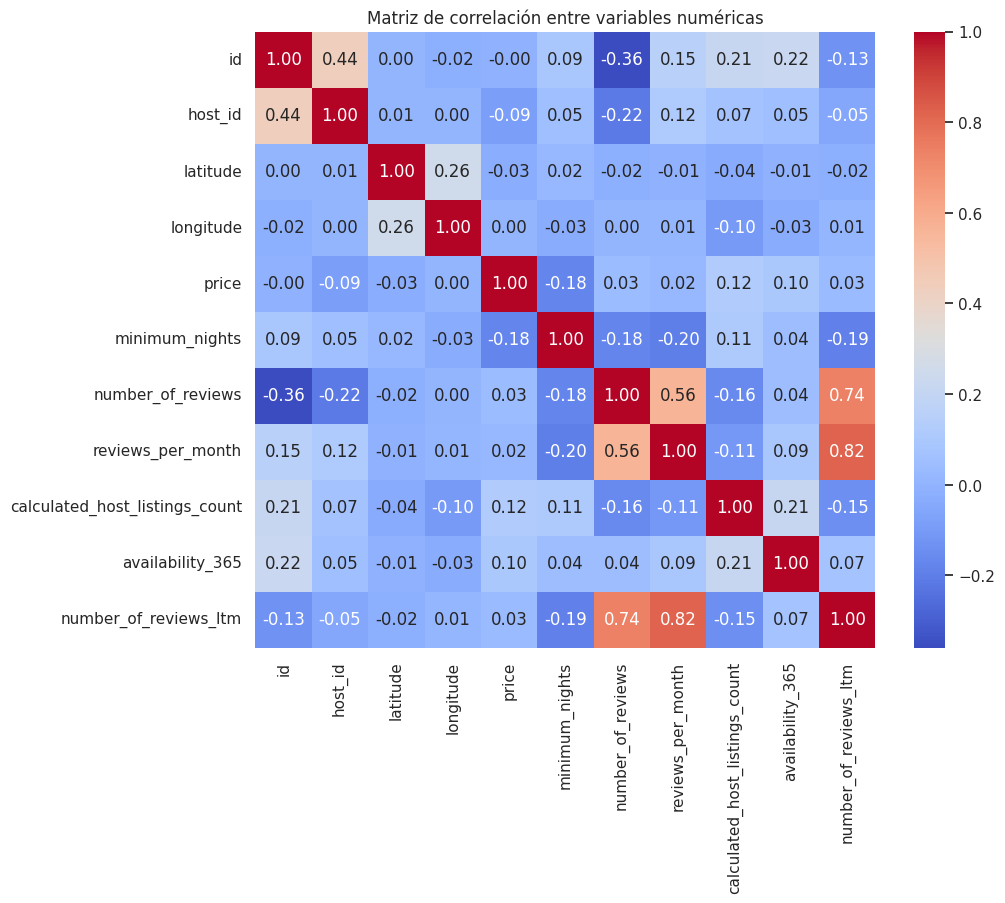

In [ ]:
corr = df.corr(numeric_only=True) #Solo para hacer correlaciones para hacer variables numéricas
#O corr = df.select_dtypes(includes= ['int']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [ ]:
corr = df.corr(numeric_only=True).abs() #Incluir abs para hacerlo absoluto
corr[corr != 1].max().sort_values(ascending=False)

,0
number_of_reviews_ltm,0.820468
reviews_per_month,0.820468
number_of_reviews,0.737474
id,0.436375
host_id,0.436375
latitude,0.256568
longitude,0.256568
availability_365,0.221765
calculated_host_listings_count,0.209633
minimum_nights,0.198029


In [ ]:
# TODO: mostrar las 10 correlaciones más fuertes ordenadas en valor absoluto
corr = df.corr(numeric_only=True).abs() #Incluir abs para hacerlo absoluto
corr[corr != 1].max().sort_values(ascending=False)


,0
number_of_reviews_ltm,0.820468
reviews_per_month,0.820468
number_of_reviews,0.737474
id,0.436375
host_id,0.436375
latitude,0.256568
longitude,0.256568
availability_365,0.221765
calculated_host_listings_count,0.209633
minimum_nights,0.198029


### Relaciones entre variables

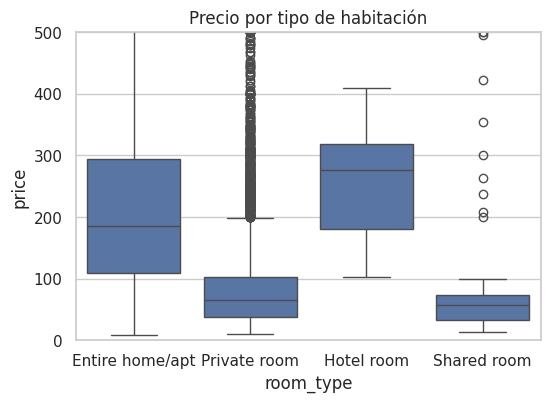

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Precio por tipo de habitación')
plt.ylim(0, df['price'].quantile(0.95))
plt.show()

In [ ]:
# TODO: gráfico de conteo (countplot) de los barrios/neighborhoods con más alojamientos
